In [1]:
# based on https://github.com/carnby/carto-en-python/blob/master/02%20-%20Choroplet%20Dot%20Symbol%20Maps.ipynb
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ésta es una biblioteca ad-hoc que estamos construyendo con Diego Caro
import carpynter

# Esto configura la apariencia de los gráficos utilizando configuraciones de seaborn
sns.set(context='poster', style='ticks', palette='inferno', font='Linux Biolinum O')

# Esto es una instrucción de Jupyter que hace que los gráficos se desplieguen en el notebook
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

In [2]:
# hay que bajar los mapas desde: https://www.bcn.cl/siit/mapas_vectoriales/index_html
municipalities = gpd.read_file('./division_comunal/', crs={'init': 'epsg:5361'})
femicidios = pd.read_csv('preview.csv')

def decode_comunes(comune):
    name_map = {
        'Los Angeles': 'Los Ángeles',
        'Padre Las Casas': 'Padre las Casas',
        'Llaillay': 'Llay Llay',
        'Calera': 'La Calera'
    }
    if comune in name_map:
        return name_map[comune]
    return comune
municipalities['NOM_COM'] = municipalities.NOM_COM.apply(decode_comunes)

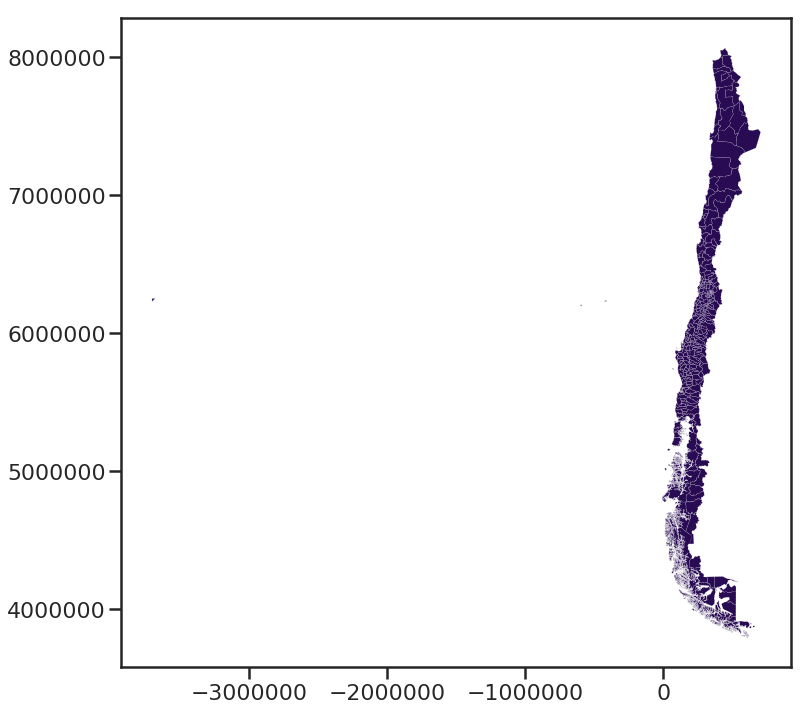

In [19]:
municipalities.plot(figsize=(12,12), linewidth=.1)

In [3]:
for m_comuna in femicidios.comuna.dropna().unique():
    if m_comuna not in municipalities.NOM_COM.unique():
        print(m_comuna)

In [4]:
total_femicidios = pd.DataFrame()
total_femicidios['NOM_COM'] = femicidios.comuna.value_counts().index
total_femicidios['total'] = femicidios.comuna.value_counts().values
#total_femicidios

In [26]:
data = municipalities.merge(total_femicidios, how='left', on='NOM_COM').fillna(0) #).to_crs({'init': 'epsg:4326'})

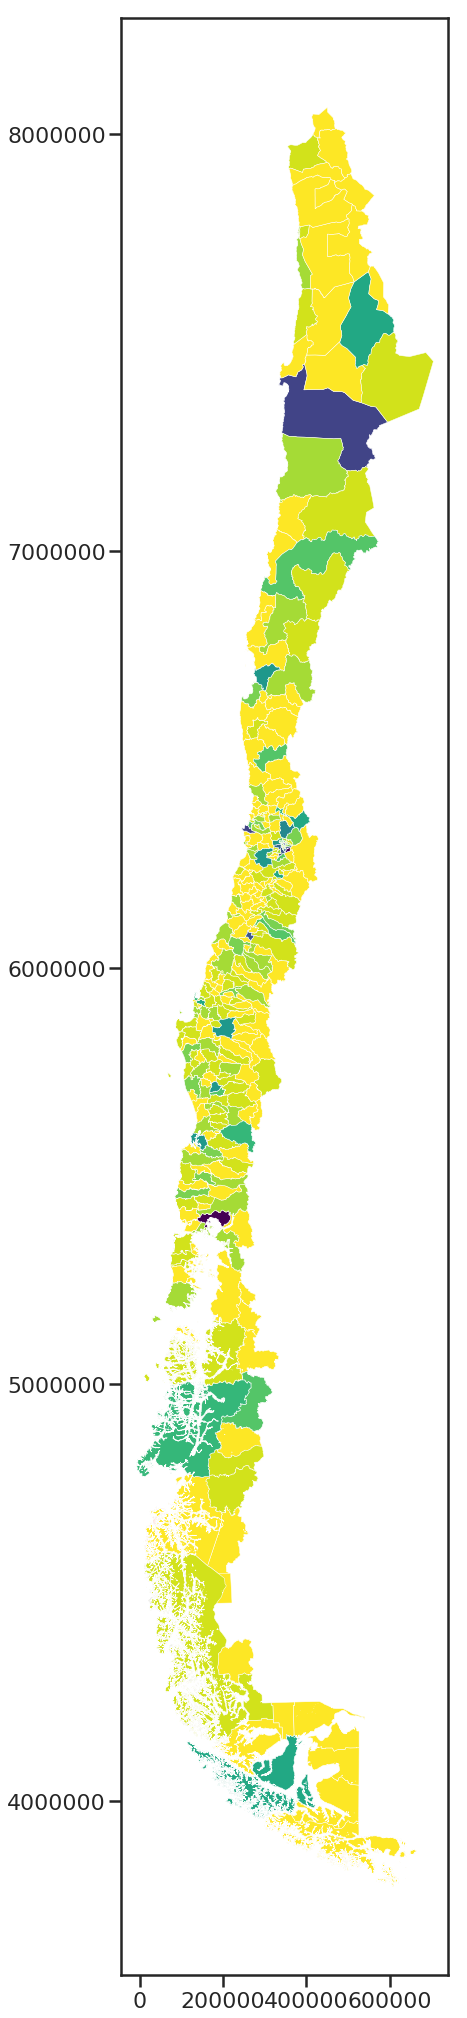

In [27]:
excludes = [
    'Juan Fernández',
    'Isla de Pascua'
]
data.query('NOM_COM not in @excludes').plot(column='total', figsize=(36,36), linewidth=.5, cmap='viridis_r')

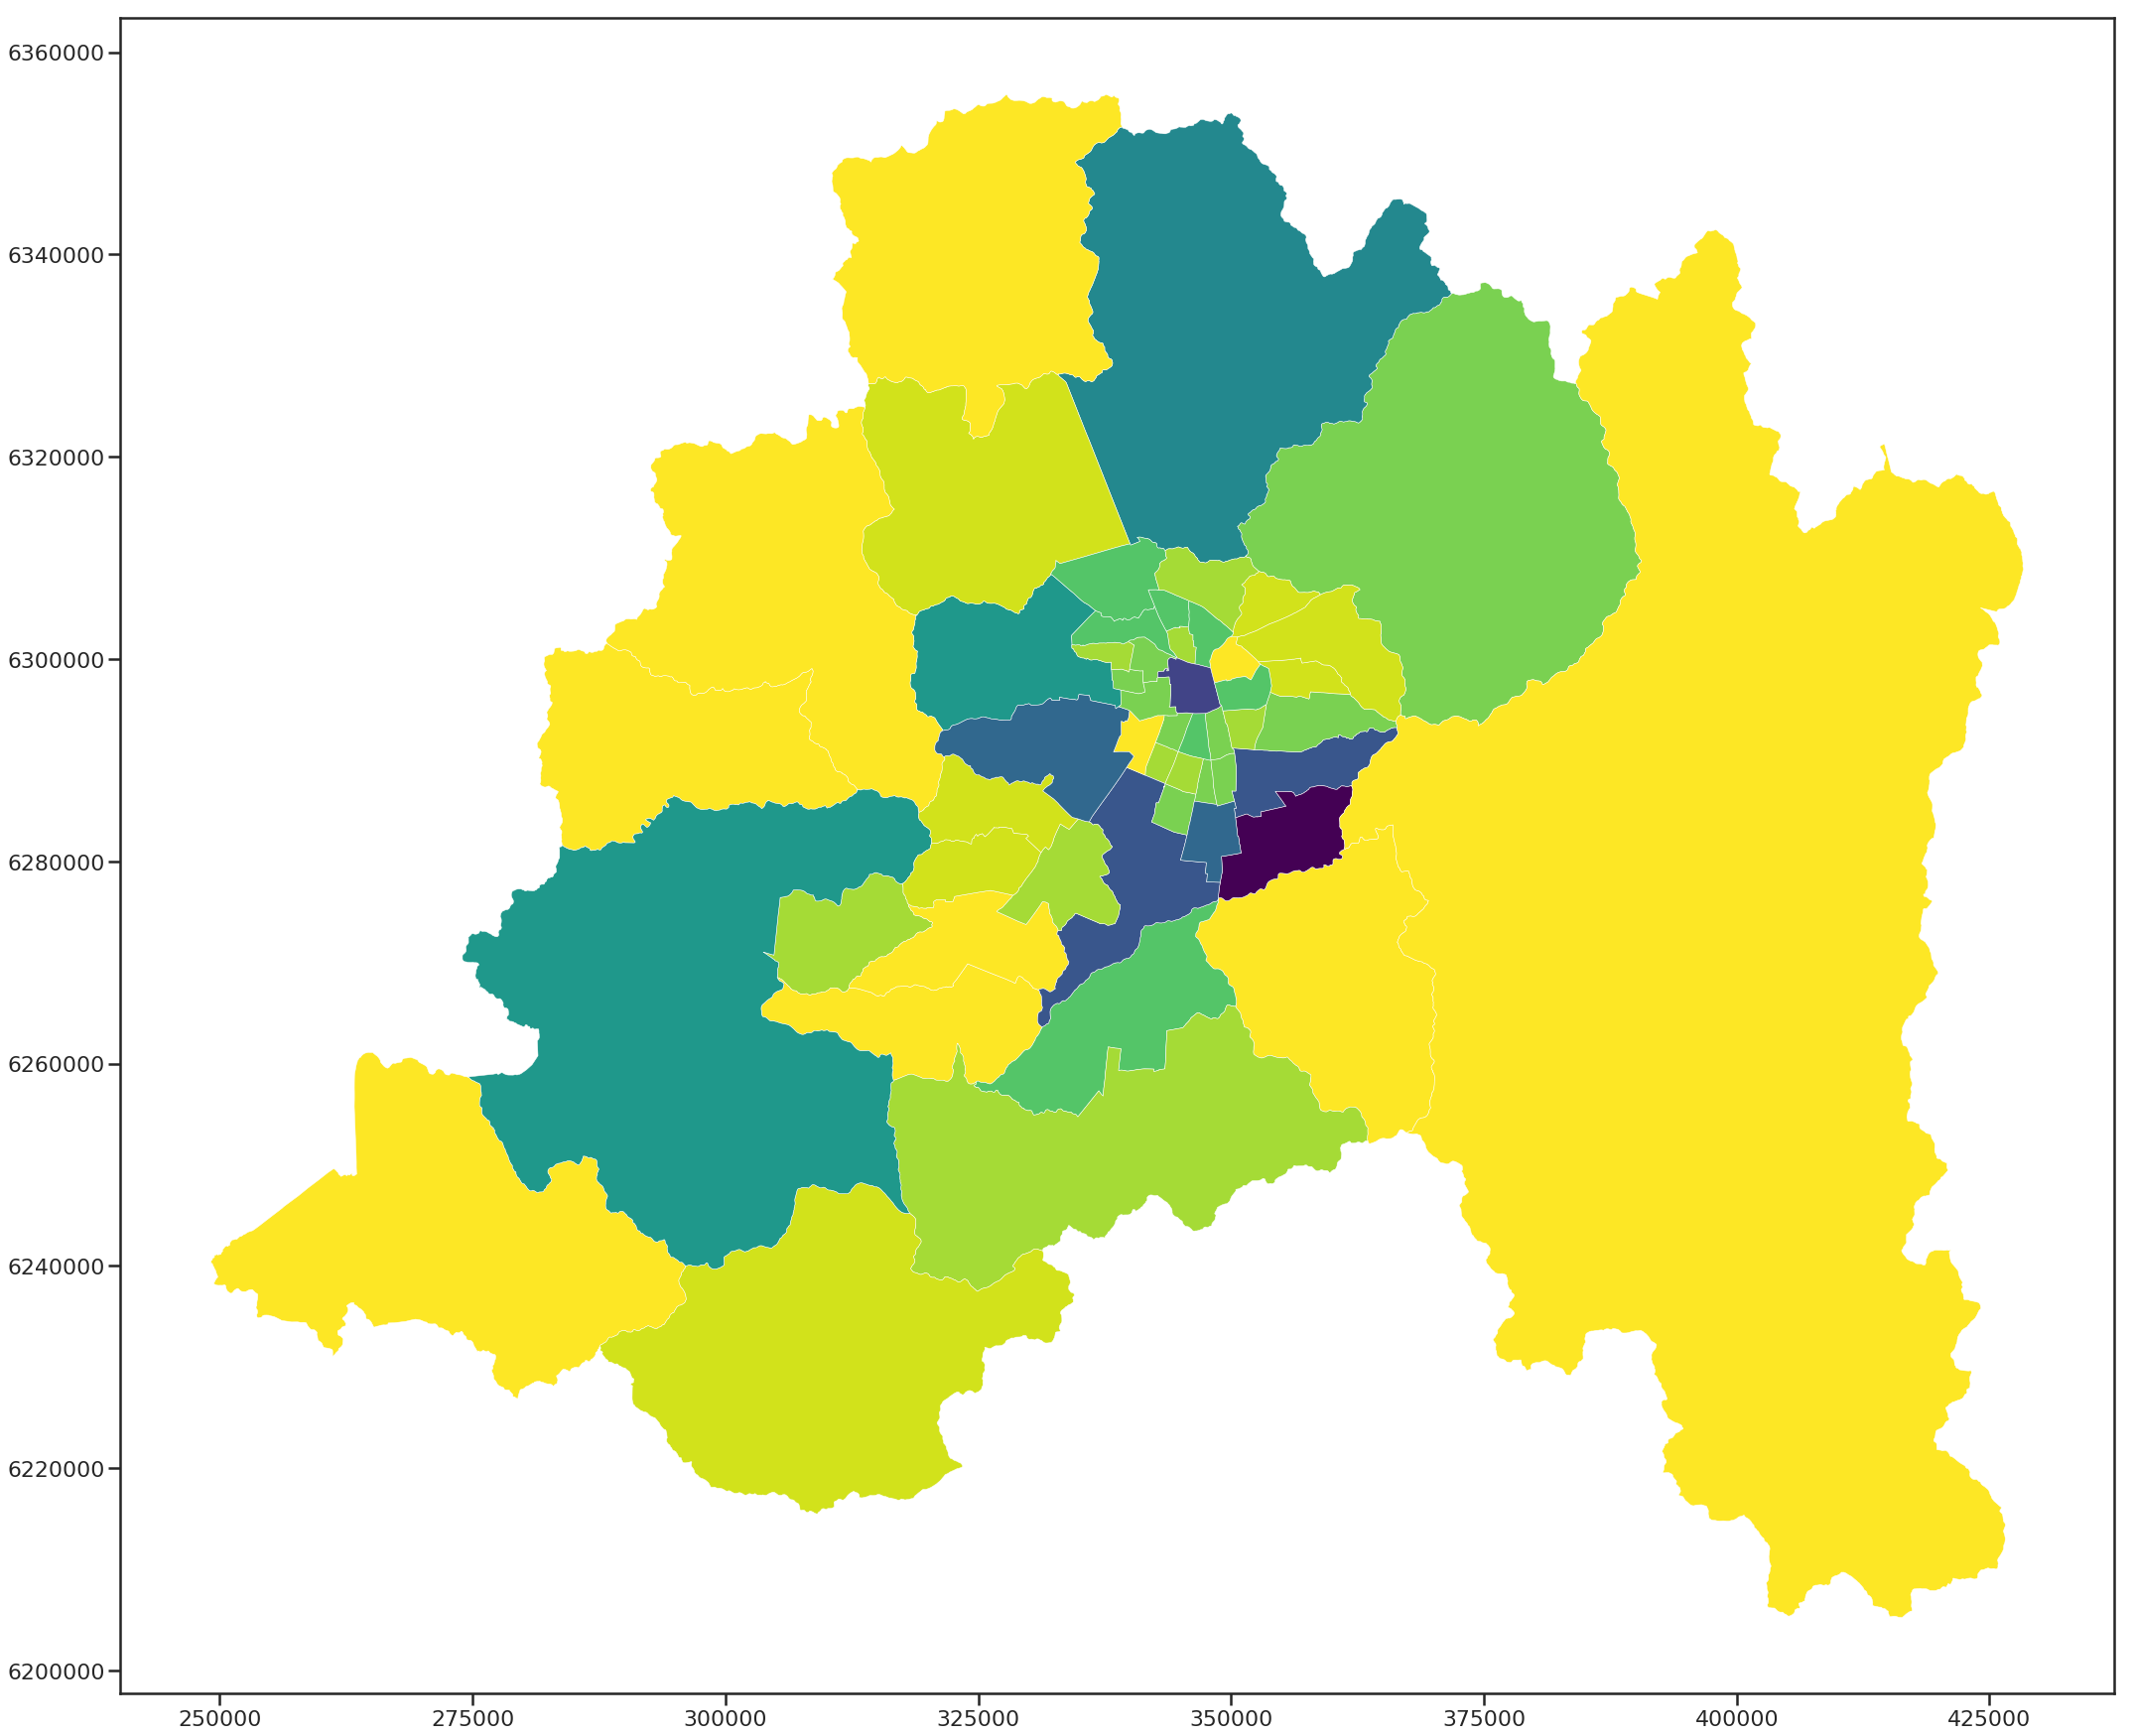

In [29]:
data.query('NOM_REG == "Región Metropolitana de Santiago"').plot(column='total', figsize=(36,36), linewidth=.5, cmap='viridis_r')